# **IIA007 (1SEM2025) Atividade Prática - Preparação de Dados do Titanic**

## Disciplina: Inteligência Artificial e Aplicações - FATEC Ferraz de Vasconcelos
### Professora: Ana Rosa C. Tonão
#### Data:26/05/2025
####Nome: Diego Farias, Kevin LOurenco e Weigless Camargo.


In [ ]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


## **Descrição dos Dados**

O conjunto de dados do Titanic contém características individuais dos passageiros e sobre a viagem.

Utilizando este conjunto de dados será possível criar um modelo de aprendizado de máquina que permitirá classificar os passageiros, entre os que sobreviveram e os que morreram naquela infeliz tragédia.

Cada passageiro é descrito pelas variáveis listadas abaixo:

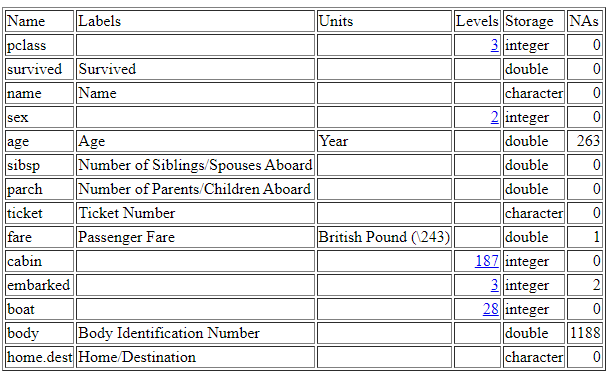

pclass: classe do passageiro (1=primeira, 2=segunda, 3=terceira)

cabin: cabine

embarked: local em que o passageiro embarcou (C=Cherbourg, Q=Queenstown, S=Southamption)

boat: bote salva-vidas

*survived: sobreviveu (0=não, 1=sim)*

### **Fonte:**
https://hbiostat.org/data/repo/Ctitanic3.html


# **Parte I**

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/MyDrive/titanic')

## **Importando as bibliotecas necessárias**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# **Parte II - Tratando os dados de TREINO**

## **Carregando os dados de TREINO**

In [ ]:
# Carregando os dados do arquivo train.csv em um dataframe pandas

# Arquivo train.csv: arquivo de texto separado por vírgula

df_train = pd.read_csv('/content/MyDrive/MyDrive/titanic/train.csv')

## **Inspecionando o conjunto de dados de TREINO**

In [ ]:
# Apresentando os datatypes das colunas do conjunto de dados
df_train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# Usando o atributo .shape para apresentar o número de linhas e colunas
df_train.shape

(891, 12)

In [ ]:
# Estatísticas resumidas
# O método .describe informa os dados somente de colunas numéricas

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Truncando para apresentar somente as duas primeiras colunas numéricas
df_train.describe().iloc[:, :2]

,PassengerId,Survived
count,891.000000,891.000000
mean,446.000000,0.383838
std,257.353842,0.486592
min,1.000000,0.000000
25%,223.500000,0.000000
50%,446.000000,0.000000
75%,668.500000,1.000000
max,891.000000,1.000000


## **Limpeza dos dados**

In [ ]:
# Apresentando o número de dados ausentes por coluna do conjunto de dados
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Decida quais colunas parecem ser importantes para responder à pergunta:


**O passageiro sobreviveu ou morreu?**



---


* Liste abaixo as colunas que em sua opinião deverão ser mantidas no modelo de regressão logística. Se possível inclua uma justificativa.

       *nome_coluna*

       *nome_coluna*

       *....*


* Verifique quais necessitam de limpeza e/ou tratamento de informações.




In [ ]:
# Avaliando os valores das colunas tipo object.
# As colunas tipo object podem conter categorias (dados tipo string com baixa cardinalidade), que são boas candidatas para label encoding (rotulagem).

df_train.Sex.value_counts(dropna=False)

,count
Sex,
male,577
female,314


In [ ]:
# Avaliando os valores das colunas tipo object.
# As colunas tipo object podem conter categorias (dados tipo string com baixa cardinalidade), que são boas candidatas para label encoding (rotulagem).

df_train.Embarked.value_counts(dropna=False)

,count
Embarked,
S,644
C,168
Q,77
NaN,2


In [ ]:
# Identifique colunas que não apresentem nenhuma variação ou sinal, ou seja, que não estão fornecendo informações importantes para o modelo.

name = df_train.Name
name.head(3)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"


In [ ]:
# Elimine colunas deste tipo que você encontrar no conjunto de dados.
df_train = df_train.drop(
    columns=[
        "PassengerId",
        "Name",
        "Ticket",
        "Cabin",
        "Embarked"
    ]
)

In [ ]:
df_train.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64


In [ ]:
# Crie colunas dummy a partir de colunas de string
df_train = pd.get_dummies(df_train)

In [ ]:
df_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [ ]:
# Remova colunas altamente correlacionadas para resolver o problema de multicolinearidade.
df_train = df_train.drop(columns="Sex_male")

In [ ]:
## Se executar as de cima, não executar esta
# Crie colunas dummy a partir de colunas de string, realizando os dois passos acima com um só código
df_train = pd.get_dummies(df, drop_first=True)

NameError: name 'df' is not defined

In [ ]:
df_train.columns

# **Parte III - Tratando os dados de TESTE**

## **Carregando os dados de TESTE**

In [ ]:
df_test = pd.read_csv('/content/MyDrive/MyDrive/titanic/test.csv')

## **Inspecionando o conjunto de dados de TESTE**

In [ ]:
df_train.dtypes

## **Grave os DataFrames tratados com novos nomes**

In [ ]:
# Gravando o dataframe de TREINO tratado, em formato CSV)

df_train.to_csv('/content/MyDrive/MyDrive/titanic/train_final.csv')

In [ ]:
# Gravando o dataframe de TESTE tratado, em formato CSV)
df_test.to_csv('/content/MyDrive/MyDrive/titanic/test_final.csv')

## ***FIM***